# PROJECT 3 - HAPPINESS SCORE PREDICTION
# NAME - SUBHAM
# BATCH - DS2401

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [16]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
#there are 158 rows and 12 columns in the dataset
df.shape

(158, 12)

In [4]:
# datatype of country and region is object/string and other columns datatypes is float
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [17]:
#null vaules are not present in the data
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<Axes: >

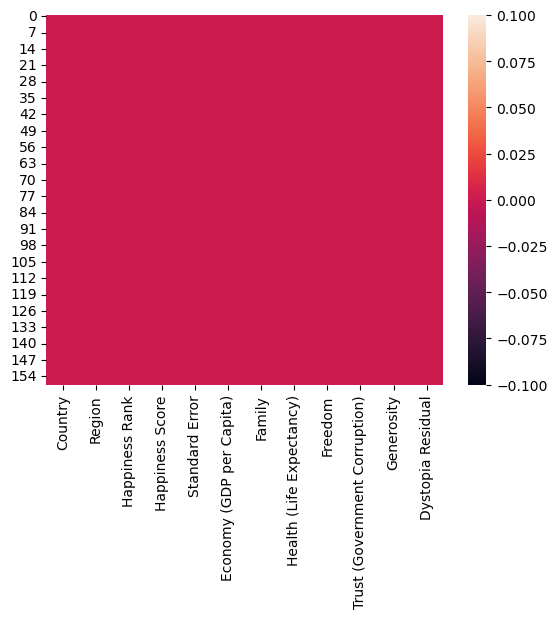

In [9]:
# vizually represents that null value is not present
sns.heatmap(df.isnull())

In [18]:
#not null count also tells us that null values are not present in the data and dtype tells us about datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [10]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Country
Switzerland    1
Bangladesh     1
Greece         1
Lebanon        1
Hungary        1
              ..
Kazakhstan     1
Slovenia       1
Lithuania      1
Nicaragua      1
Togo           1
Name: count, Length: 158, dtype: int64


Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64


Happiness Rank
82     2
1      1
110    1
103    1
104    1
      ..
54     1
55     1
56     1
57     1
158    1
Name: count, Length: 157, dtype: int64


Happiness Score
5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: count, Length: 157, dtype: int64


Standard Error
0

In [ ]:
#length represents no. of unique values so most columns have 158 unique values same as 158 rows meaning no blank data 
#some columns have 157 length as 1 value is repeated twice in hapiness rank,happiness score,health (life expectency),
#trust(govt corruption)
#one column have length 153 as some values comes 2 times
#all this tells that there is no blank data in dataset

# DESCRIPTION OF DATASET

In [19]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [ ]:
#1)count is 158 in all columns which tells that there is no null value 
#2)all the columns have mean and median(50%) values almost equal so the skewness is almost zero but skewness is still present
#  some right skew data are happiness score,trust,generosity
#  left skew data are economy,family,health,freedom
#3)there are some jumped values in 75% and max which are happiness rank,standard error,trust,generosity,dystopia residual
#  and jumped values in min and 25% which are happiness score,family,freedom,dystopia residual which tells that there might 
#  be outliers present

In [ ]:
#

<Axes: >

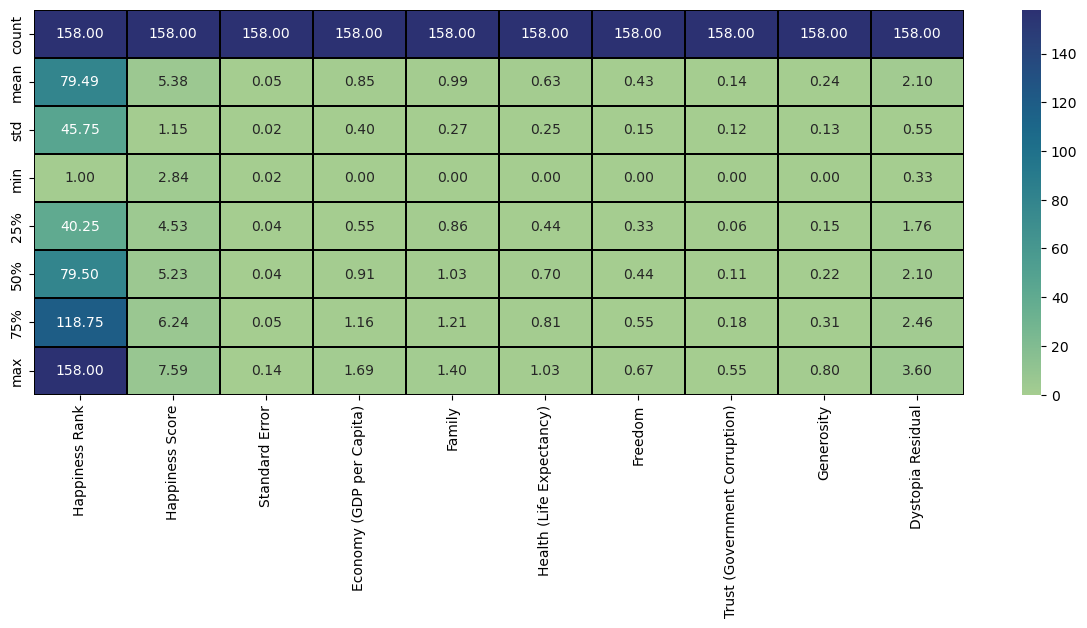

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(df.describe(),annot=True ,fmt='0.2f' ,linewidth=0.2,linecolor='black',cmap='crest' )

In [ ]:
#vizually represented the information

# CHECKING SKEWNESS

In [16]:
df1=df.iloc[:,0:2]
df1

,Country,Region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America
...,...,...
153,Rwanda,Sub-Saharan Africa
154,Benin,Sub-Saharan Africa
155,Syria,Middle East and Northern Africa
156,Burundi,Sub-Saharan Africa


In [17]:
df2=df.iloc[:,2:]
df2

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [21]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))


In [22]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135.0,9.0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58.0,9.0,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37.0,9.0,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105.0,9.0,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24.0,5.0,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118.0,8.0,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13.0,8.0,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136.0,4.0,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21.0,8.0,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [23]:
#numerical way of finding skewness
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [ ]:
# allowed values are -0.5 to 0.5
#standard error,family,health,trust,generosity all have skewness

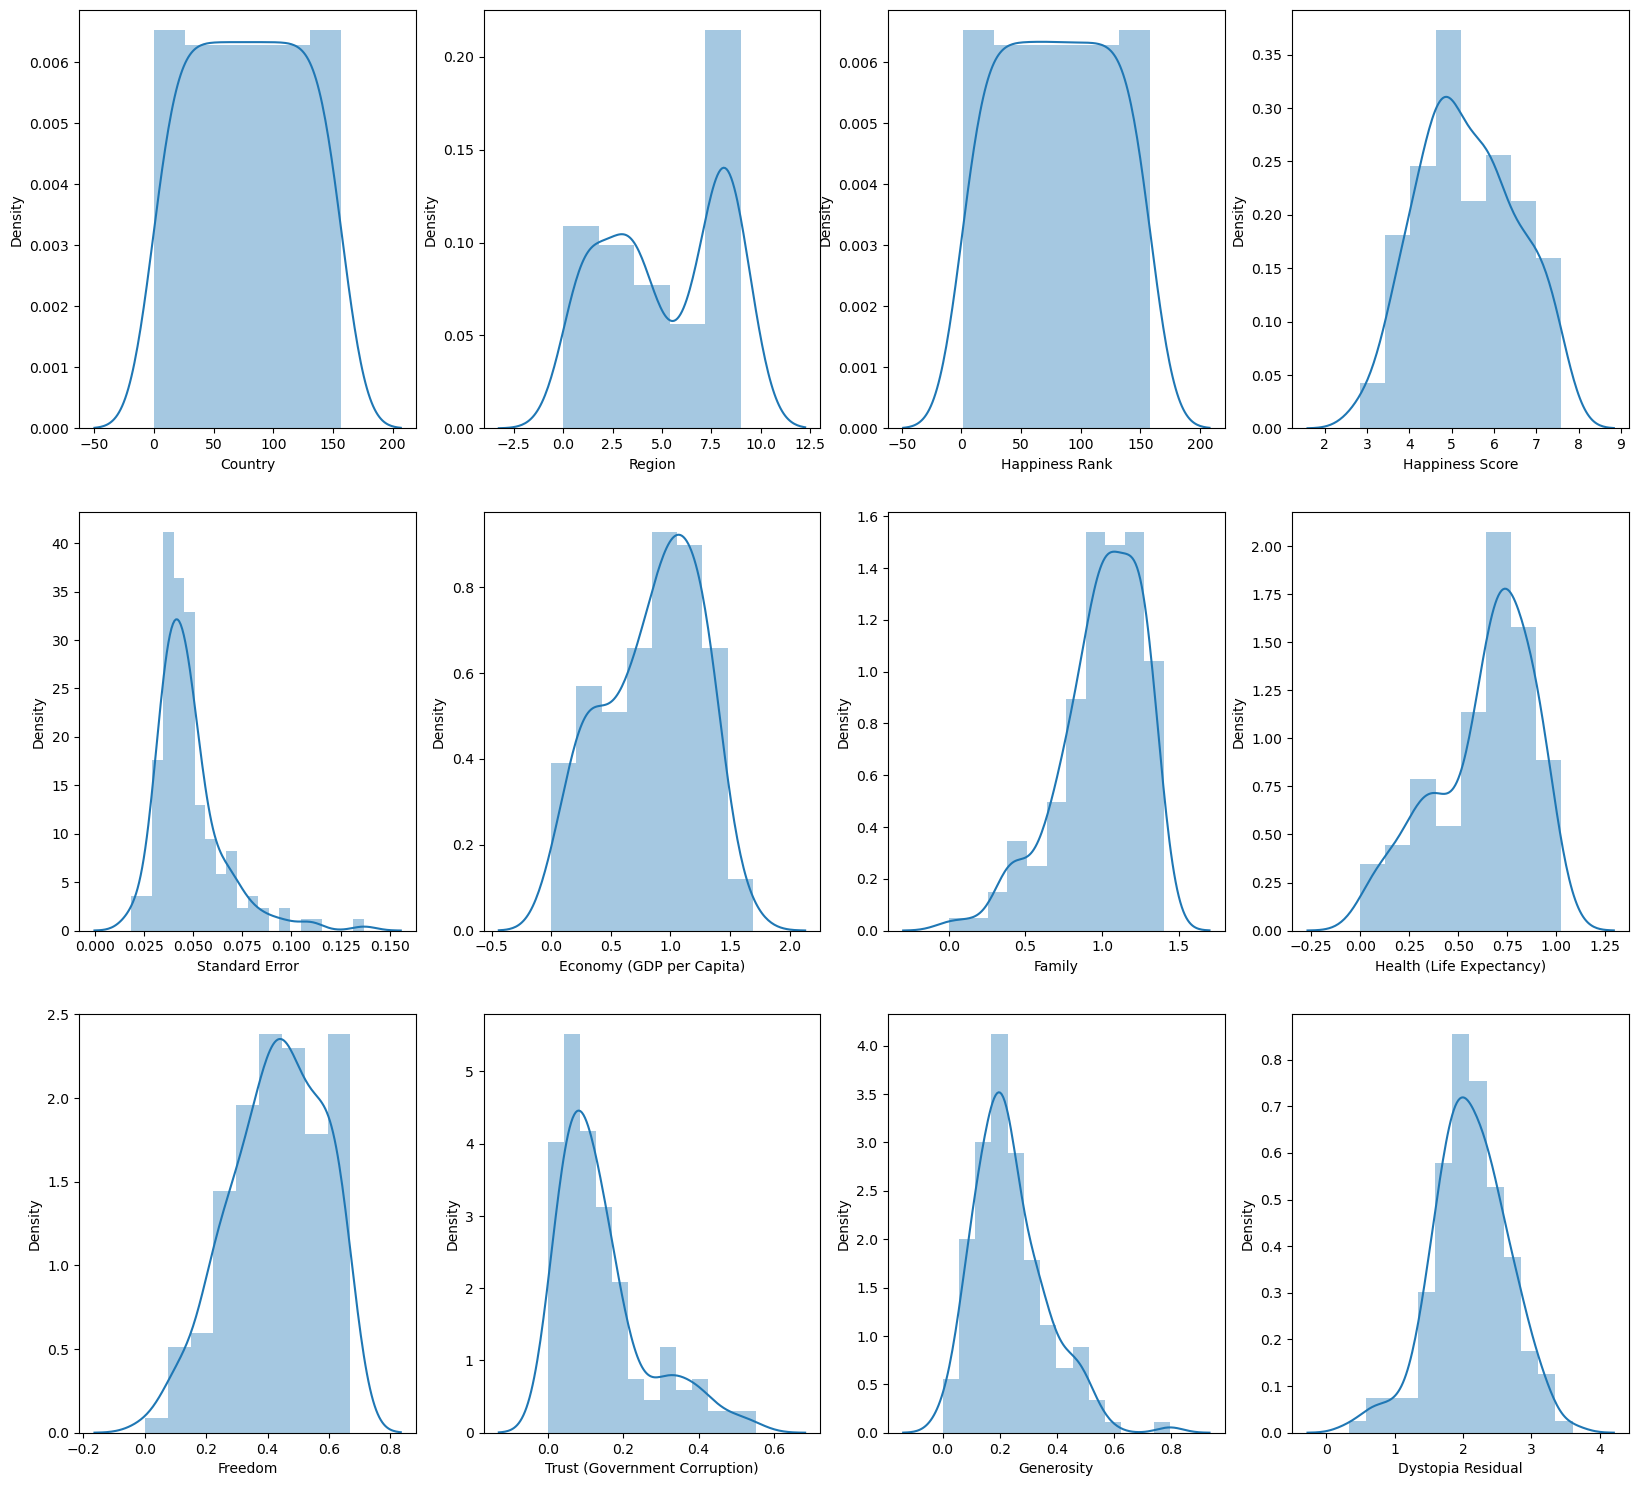

In [7]:
#vizual way of representing skewness
a=df.columns
a
#for checking skewness of multiple columns at the same time
plt.figure(figsize=(20,25))
p=1
for i in a:
    if p<=12:
        ax=plt.subplot(4,4,p)
        sns.distplot(df[i])
    p+=1


In [24]:
#removing skewness 
df['Standard Error']=np.cbrt(df['Standard Error'])
df['Family']=np.cbrt(df['Family'])
df['Health (Life Expectancy)']=np.cbrt(df['Health (Life Expectancy)'])
df['Trust (Government Corruption)']=np.cbrt(df['Trust (Government Corruption)'])
df['Generosity']=np.cbrt(df['Generosity'])

In [25]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   0.979748
Economy (GDP per Capita)        -0.317575
Family                          -3.573056
Health (Life Expectancy)        -1.981292
Freedom                         -0.413462
Trust (Government Corruption)    0.011932
Generosity                      -0.961079
Dystopia Residual               -0.238911
dtype: float64

In [33]:
df['Standard Error']=np.log(df['Standard Error'])
df['Family']=np.log(df['Family'])
df['Health (Life Expectancy)']=np.log(df['Health (Life Expectancy)'])
df['Trust (Government Corruption)']=np.log(df['Trust (Government Corruption)'])
df['Generosity']=np.log(df['Generosity'])

In [34]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   0.484623
Economy (GDP per Capita)        -0.317575
Family                                NaN
Health (Life Expectancy)              NaN
Freedom                         -0.413462
Trust (Government Corruption)         NaN
Generosity                            NaN
Dystopia Residual               -0.238911
dtype: float64

In [45]:
from scipy.stats import boxcox
df['Standard Error']=boxcox(df['Standard Error'])
df['Family']=boxcox(df['Family'])
df['Health (Life Expectancy)']=boxcox(df['Health (Life Expectancy)'])
df['Trust (Government Corruption)']=boxcox(df['Trust (Government Corruption)'])
df['Generosity']=boxcox(df['Generosity'])

ValueError: Length of values (2) does not match length of index (158)

In [ ]:
# i tried removing skewness with other methods like log and boxcox but it generates NaN values so i have done only with cuberoot
# method for removing skewness 

# CHECKING OUTLIERS

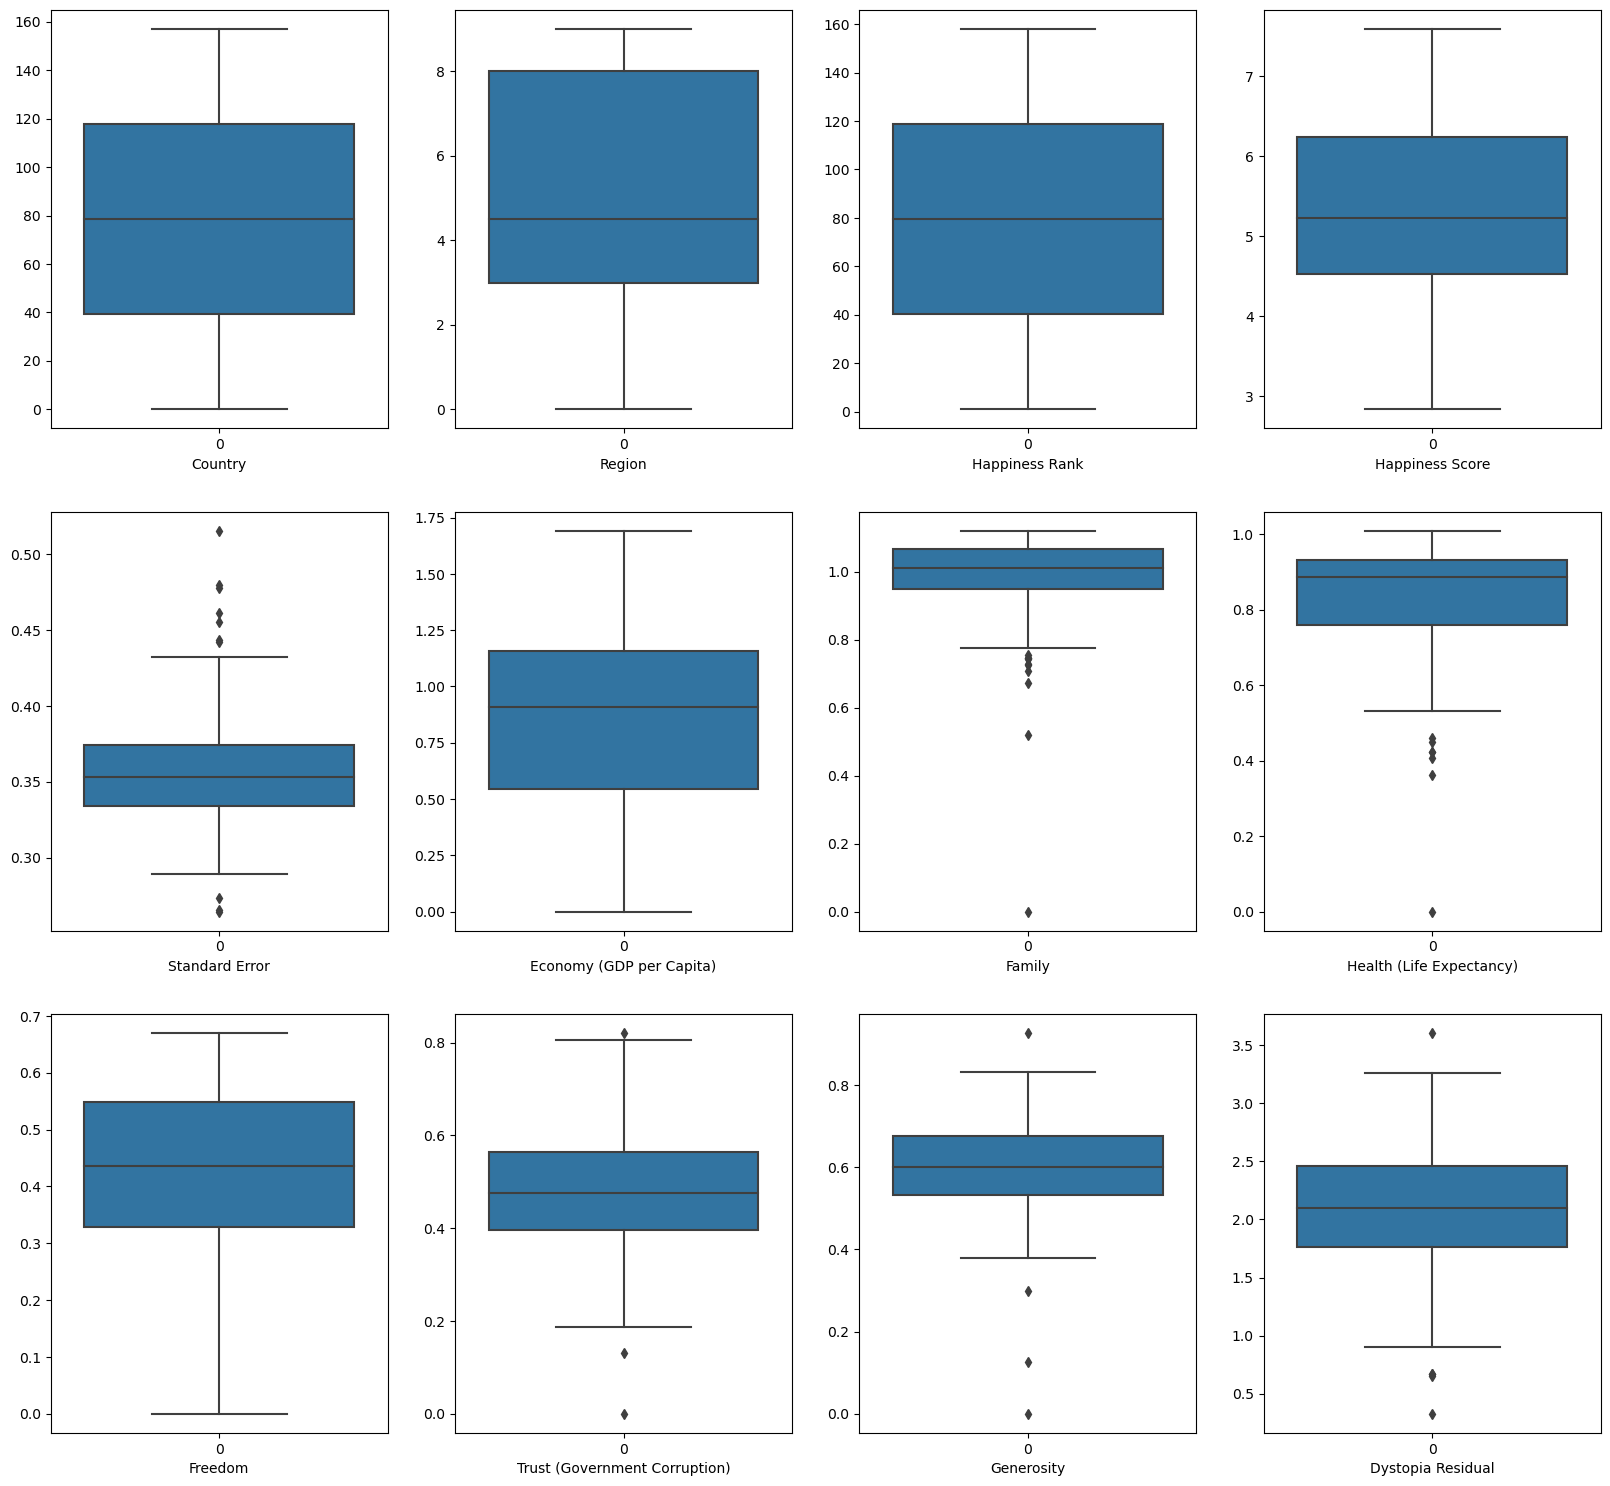

In [26]:
#check for outliers using boxplot
# for multiple boxplot visualization
plt.figure(figsize=(20,25))
p=1
for i in a:
    if p<=12:
        ax=plt.subplot(4,4,p)
        sns.boxplot(df[i])
        plt.xlabel(i)
    p+=1


In [ ]:
# we can see from box plot that standard error,family,trust,generosity dystopia have outliers 

# REMOVING OUTLIERS

In [27]:
from scipy.stats import zscore

In [28]:

z=np.abs(zscore(df))
z

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.238770,1.300256,1.721000,1.937360,0.892612,1.369621,0.952066,0.959021,1.577438,1.826993,0.576890,0.758258
1,0.449465,1.300256,1.699075,1.914581,0.172283,1.135226,1.062927,0.973528,1.332456,0.260958,1.325808,1.092857
2,0.909893,1.300256,1.677149,1.884792,0.961125,1.192861,0.975580,0.803789,1.469659,2.075620,0.837993,0.712335
3,0.581016,1.300256,1.655224,1.880411,0.524996,1.525130,0.912350,0.828870,1.605131,1.592625,0.869128,0.663893
4,1.194920,0.040302,1.633299,1.797179,0.777930,1.194876,0.894384,0.876764,1.360416,1.428028,1.427657,0.639337
...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.866043,0.965117,1.633576,1.674055,0.849442,1.552987,0.507509,0.518863,1.087740,2.318782,0.104570,2.588925
154,1.436096,0.965117,1.655501,1.783571,0.696643,1.392303,2.151835,0.980600,0.372033,0.357762,0.239847,0.843967
155,1.260695,0.375441,1.677427,2.076199,0.255966,0.455245,1.583173,0.416476,1.809238,0.624780,1.489900,3.208430
156,1.260695,0.965117,1.699352,2.164688,2.157804,2.067566,1.846619,1.477816,2.064472,0.123602,0.118581,0.481985


In [29]:
df1=z[(z<3).all(axis=1)]
df1

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.238770,1.300256,1.721000,1.937360,0.892612,1.369621,0.952066,0.959021,1.577438,1.826993,0.576890,0.758258
1,0.449465,1.300256,1.699075,1.914581,0.172283,1.135226,1.062927,0.973528,1.332456,0.260958,1.325808,1.092857
2,0.909893,1.300256,1.677149,1.884792,0.961125,1.192861,0.975580,0.803789,1.469659,2.075620,0.837993,0.712335
3,0.581016,1.300256,1.655224,1.880411,0.524996,1.525130,0.912350,0.828870,1.605131,1.592625,0.869128,0.663893
4,1.194920,0.040302,1.633299,1.797179,0.777930,1.194876,0.894384,0.876764,1.360416,1.428028,1.427657,0.639337
...,...,...,...,...,...,...,...,...,...,...,...,...
151,1.282620,0.965117,1.589725,1.567167,0.203372,1.463301,0.273917,1.216061,0.224245,0.146471,0.038926,1.149044
152,1.721123,0.629977,1.611651,1.577680,1.169378,1.309758,2.430922,1.055332,1.294643,0.160368,0.967580,0.266180
153,0.866043,0.965117,1.633576,1.674055,0.849442,1.552987,0.507509,0.518863,1.087740,2.318782,0.104570,2.588925
154,1.436096,0.965117,1.655501,1.783571,0.696643,1.392303,2.151835,0.980600,0.372033,0.357762,0.239847,0.843967


In [13]:
#11 rows are removed as they were outliers

In [30]:
#this is percentage loss of data. max data that we can afford to lose is 10%
# since our value is 5.69% we lose 5.69% data which is within 10% range
#we cannot lose too much data as some data might be essential for model building
(df.shape[0]-df1.shape[0])/(df.shape[0])*100

6.962025316455696

# CHECK FOR CORRELATION AND MULTICOLLINEARITY

In [55]:
# we can see correaltion of all columns
df1.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,-0.031766,0.170746,0.167448,-0.024984,-0.072197,0.060634,0.051520,0.086439,0.020813,0.033702,-0.053281
Region,-0.031766,1.000000,-0.010385,0.004547,-0.023300,0.082690,0.060924,0.197657,0.064552,0.240128,-0.037024,-0.085945
Happiness Rank,0.170746,-0.010385,1.000000,0.978495,-0.027084,0.478084,0.403067,0.377282,0.158576,0.214724,0.000611,0.127327
Happiness Score,0.167448,0.004547,0.978495,1.000000,0.020866,0.482775,0.421917,0.378107,0.202951,0.250790,0.020162,0.127800
Standard Error,-0.024984,-0.023300,-0.027084,0.020866,1.000000,0.151643,0.107145,0.176908,0.002702,-0.024888,0.019542,-0.107401
Economy (GDP per Capita),-0.072197,0.082690,0.478084,0.482775,0.151643,1.000000,0.207933,0.542384,0.021303,0.189633,-0.156000,-0.127301
Family,0.060634,0.060924,0.403067,0.421917,0.107145,0.207933,1.000000,0.039362,0.065269,0.129967,0.125900,-0.091309
Health (Life Expectancy),0.051520,0.197657,0.377282,0.378107,0.176908,0.542384,0.039362,1.000000,0.008628,0.057772,-0.151244,0.018428
Freedom,0.086439,0.064552,0.158576,0.202951,0.002702,0.021303,0.065269,0.008628,1.000000,0.209606,0.054385,-0.133960
Trust (Government Corruption),0.020813,0.240128,0.214724,0.250790,-0.024888,0.189633,0.129967,0.057772,0.209606,1.000000,0.167107,-0.103512


<Axes: >

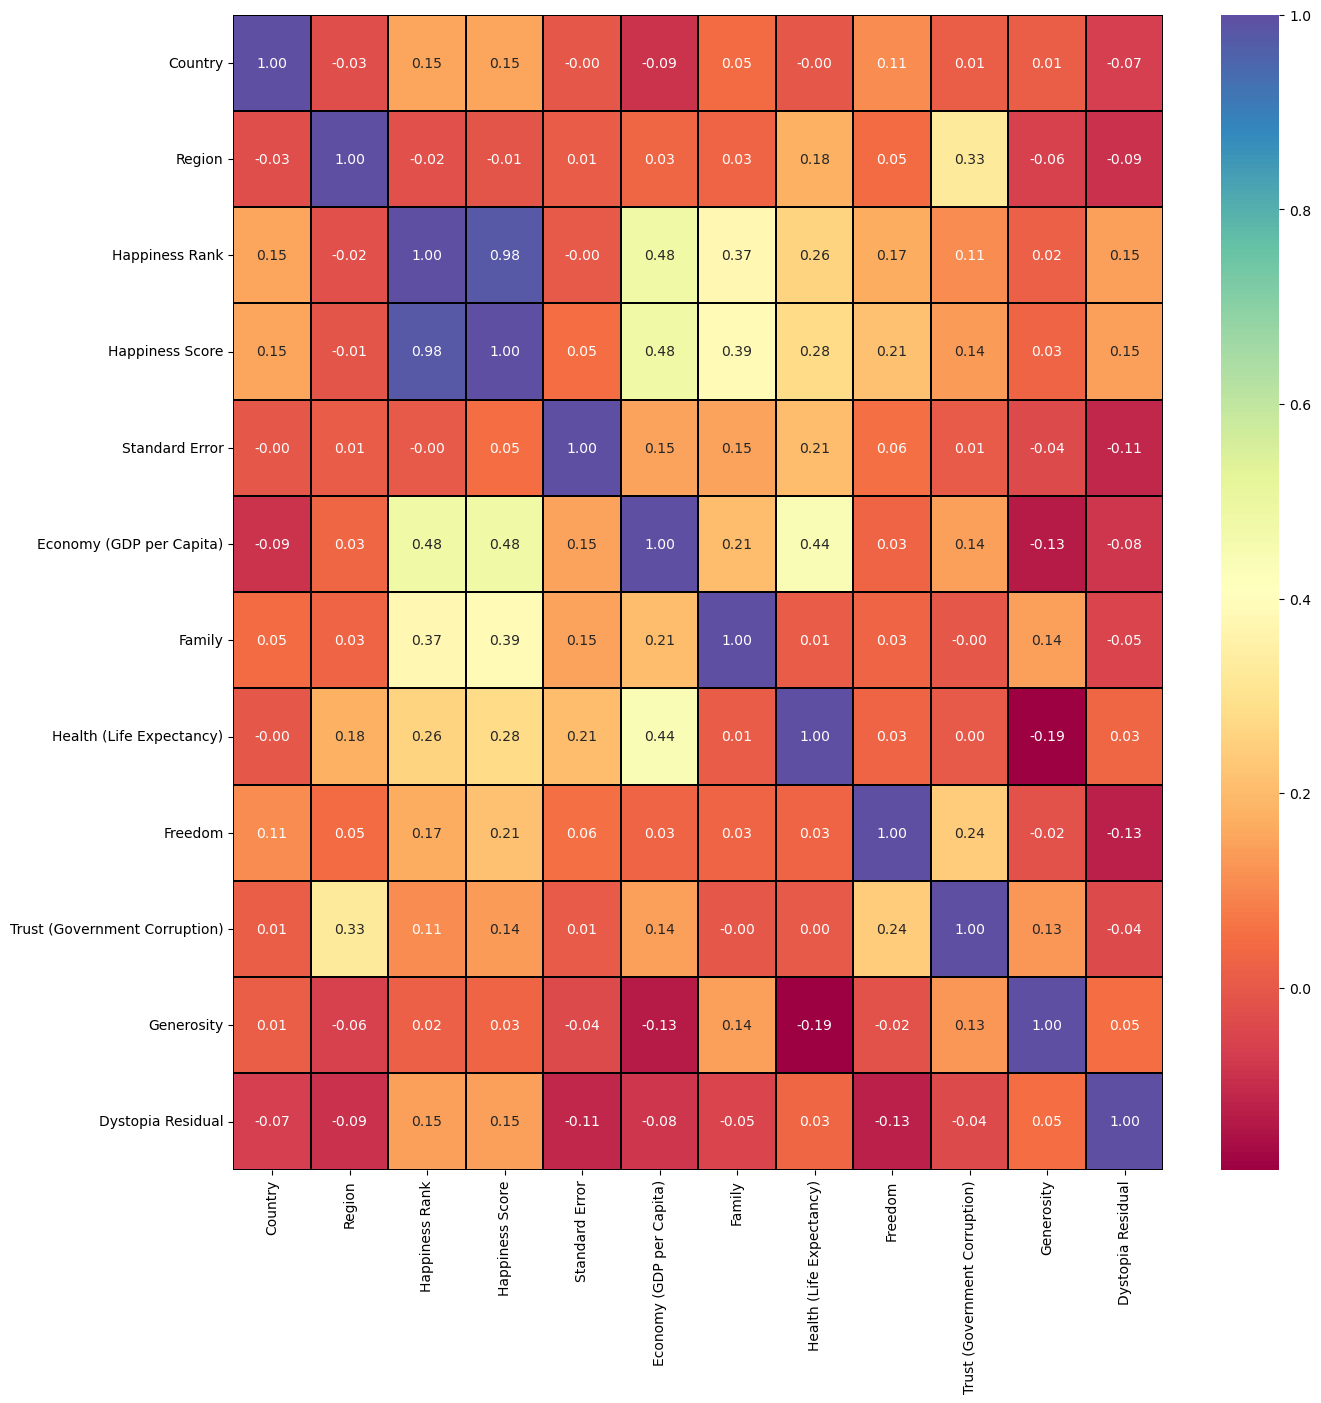

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')

<Axes: >

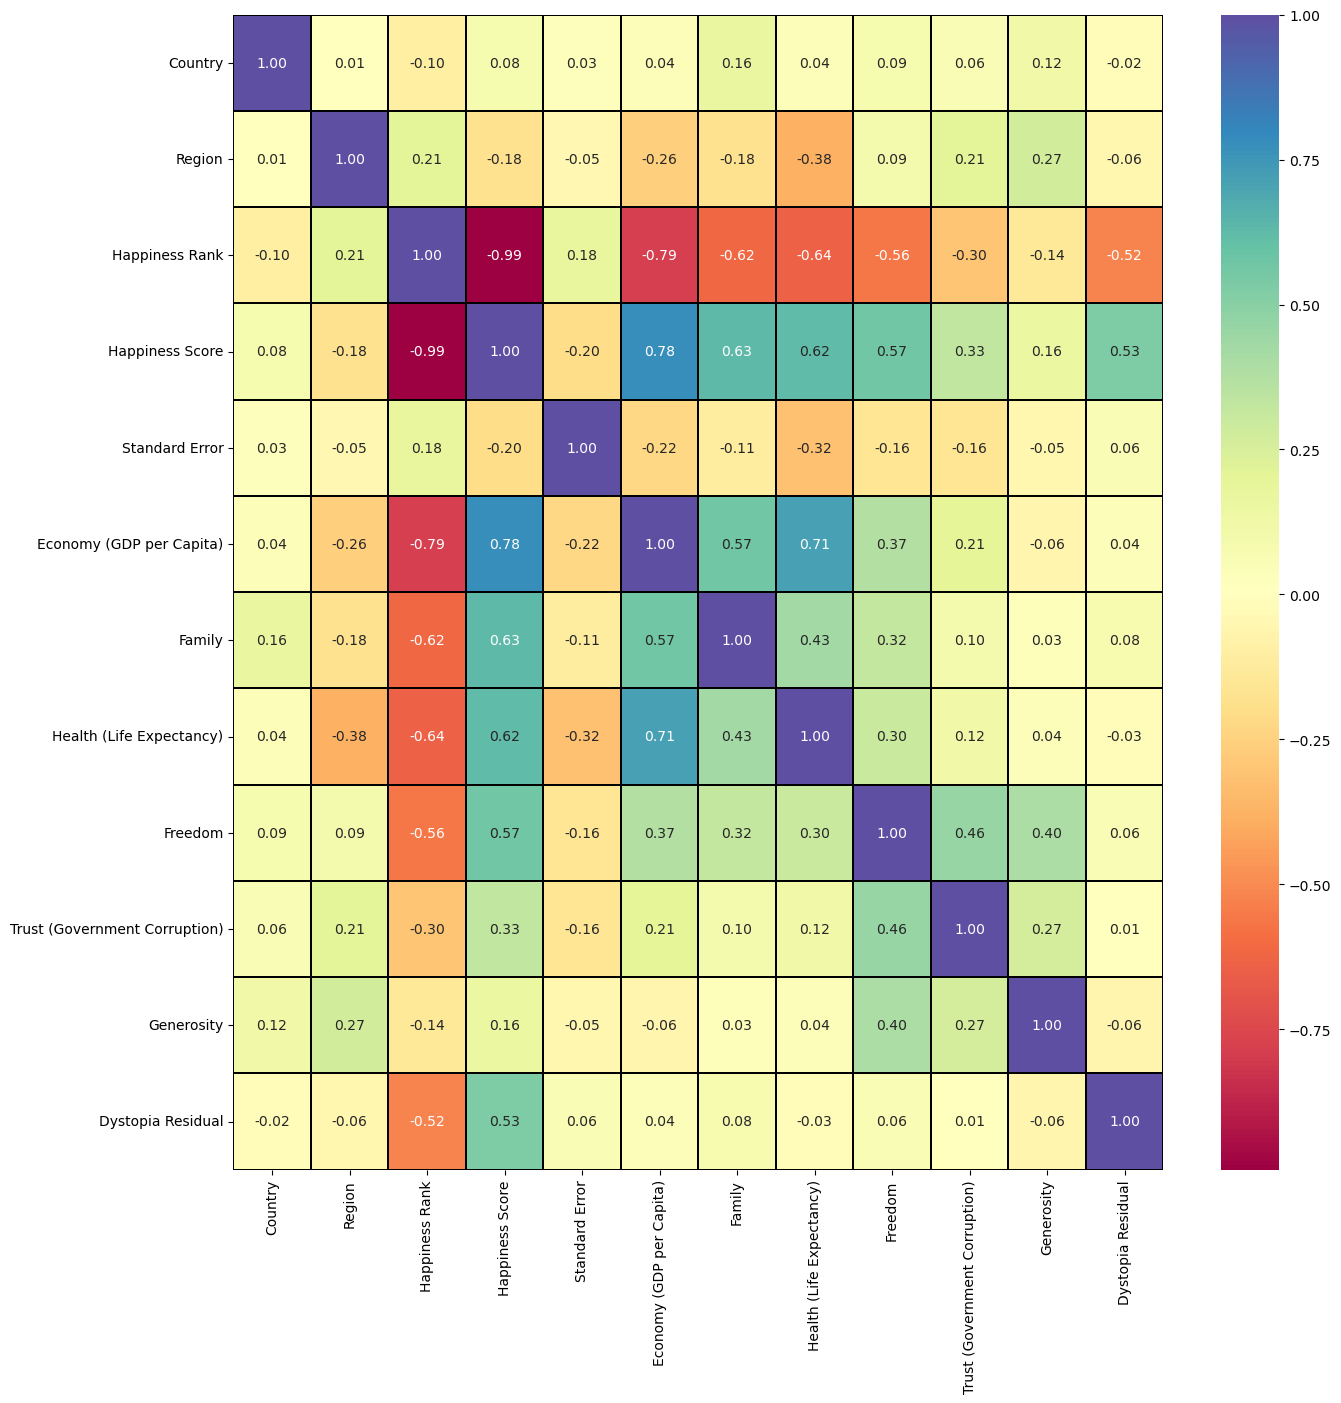

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')

In [33]:
# standard scaler is done so as to make all values from whole data on the same level/range.
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
df2=pd.DataFrame(s.fit_transform(df1),columns=df1.columns)
df2

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.743278,0.962596,1.722312,2.080271,0.389715,1.008534,0.791072,0.529922,1.335045,1.802736,-0.206293,-0.018678
1,-0.828207,0.962596,1.678258,2.037286,-0.870243,0.562975,1.030215,0.558446,0.901366,-0.851520,1.181837,0.532328
2,0.088493,0.962596,1.634205,1.981074,0.509554,0.672532,0.841797,0.224710,1.144250,2.224132,0.277664,-0.094302
3,-0.566293,0.962596,1.590151,1.972808,-0.253299,1.304139,0.705402,0.274023,1.384070,1.405509,0.335374,-0.174075
4,0.655973,-2.291447,1.546098,1.815747,0.189119,0.676363,0.666646,0.368190,0.950862,1.126534,1.370615,-0.214513
...,...,...,...,...,...,...,...,...,...,...,...,...
142,0.830583,0.097042,1.458548,1.381709,-0.815865,1.186609,-0.671783,1.035309,-1.060445,-1.045564,-1.203415,0.624855
143,1.703631,-0.768511,1.502602,1.401549,0.873818,0.894741,3.981161,0.719288,0.834427,-1.022010,0.517855,-0.829017
144,0.001188,0.097042,1.546655,1.583409,0.314205,1.357093,-0.167896,-0.335506,0.468158,2.636265,-1.081744,2.996005
145,1.136150,0.097042,1.590709,1.790069,0.046938,1.051649,3.379134,0.572350,-0.798822,-0.687449,-0.831007,0.122464


In [34]:
# standard scaler is done so as to make all values from whole data on the same level/range.
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
df4=pd.DataFrame(s.fit_transform(df),columns=df.columns)
df4

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.238770,1.300256,-1.721000,1.937360,-0.892612,1.369621,0.952066,0.959021,1.577438,1.826993,0.576890,0.758258
1,-0.449465,1.300256,-1.699075,1.914581,0.172283,1.135226,1.062927,0.973528,1.332456,0.260958,1.325808,1.092857
2,-0.909893,1.300256,-1.677149,1.884792,-0.961125,1.192861,0.975580,0.803789,1.469659,2.075620,0.837993,0.712335
3,0.581016,1.300256,-1.655224,1.880411,-0.524996,1.525130,0.912350,0.828870,1.605131,1.592625,0.869128,0.663893
4,-1.194920,-0.040302,-1.633299,1.797179,-0.777930,1.194876,0.894384,0.876764,1.360416,1.428028,1.427657,0.639337
...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.866043,0.965117,1.633576,-1.674055,-0.849442,-1.552987,-0.507509,-0.518863,1.087740,2.318782,0.104570,-2.588925
154,-1.436096,0.965117,1.655501,-1.783571,-0.696643,-1.392303,-2.151835,-0.980600,0.372033,-0.357762,-0.239847,-0.843967
155,1.260695,-0.375441,1.677427,-2.076199,0.255966,-0.455245,-1.583173,0.416476,-1.809238,0.624780,1.489900,-3.208430
156,-1.260695,0.965117,1.699352,-2.164688,2.157804,-2.067566,-1.846619,-1.477816,-2.064472,-0.123602,-0.118581,-0.481985


In [35]:
# vif factor is checked for multicollinearity
# vif values for EDA processed data
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(df1.values,i) for i in range(len(df1.columns))]
vif['features']=df1.columns
vif

,VIF values,features
0,3.685741,Country
1,6.171979,Region
2,95.240308,Happiness Rank
3,84.498468,Happiness Score
4,2.577451,Standard Error
5,5.641343,Economy (GDP per Capita)
6,3.308859,Family
7,4.032471,Health (Life Expectancy)
8,3.333301,Freedom
9,3.469147,Trust (Government Corruption)


In [ ]:
# we have to remove columns with highest vif values but we cannot rmove happiness score as it is target. we can remove happiness
# rank

In [ ]:
# df2 is standard scalar of df1 and df1 is the z score values of df
# df4 is standard scalar of df
# what i did here is i calculated vif vaules for (original data after EDA process (df1))and original data(df)

In [36]:
# vif factor is checked for multicollinearity
# vif values for original data
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(df4.values,i) for i in range(len(df4.columns))]
vif['features']=df4.columns
vif

,VIF values,features
0,1.080667,Country
1,1.470441,Region
2,76.955902,Happiness Rank
3,147.307308,Happiness Score
4,1.219021,Standard Error
5,20.418807,Economy (GDP per Capita)
6,4.302530,Family
7,4.278094,Health (Life Expectancy)
8,4.123509,Freedom
9,1.791244,Trust (Government Corruption)


In [ ]:
# we can remove happiness rank but dystopia residual and economy are crucial factors for happiness score pridiction so we 
# cannot remove them

In [2]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [ ]:
# smote is showing errors so i can't balance the data

# MODEL BUILDING

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [67]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.linear_model import Lasso as l , Ridge as r

In [87]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [72]:
x=df.drop('Happiness Score',axis=1)
y=df['Happiness Score']
print('feature dimension',x.shape)
print('label dimension',y.shape)

feature dimension (158, 11)
label dimension (158,)


In [40]:
maxaccu=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print('max r2 is',maxaccu,'at random state',maxrs)

max r2 is 0.995850742954102 at random state 163


In [73]:
maxaccu=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print('max r2 is',maxaccu,'at random state',maxrs)

max r2 is 0.995850742954102 at random state 163


In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=163)

In [75]:
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
pred_train_lr=lr.predict(x_train)
print(lr)
print('r2 score',r2_score(y_test,predlr))
print('r2 score on training data',r2_score(y_train,pred_train_lr))
print('mean absloute error',mean_absolute_error(y_test,predlr))
print('mean squared error',mean_squared_error(y_test,predlr))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,predlr)))

LinearRegression()
r2 score 0.995850742954102
r2 score on training data 0.9916440762102835
mean absloute error 0.05887762069526942
mean squared error 0.00549894448626945
root mean squared error 0.07415486825738045


In [71]:
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
pred_train_lr=lr.predict(x_train)
print(lr)
print('r2 score',r2_score(y_test,predlr))
print('r2 score on training data',r2_score(y_train,pred_train_lr))
print('mean absloute error',mean_absolute_error(y_test,predlr))
print('mean squared error',mean_squared_error(y_test,predlr))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,predlr)))

TypeError: LinearRegression.fit() missing 1 required positional argument: 'y'

In [54]:
r=x.to_numpy()
rf=y.to_numpy()
r


array([[135.        ,   9.        ,   1.        , ...,   0.74875646,
          0.66702925,   2.51738   ],
       [ 58.        ,   9.        ,   2.        , ...,   0.5210359 ,
          0.75845253,   2.70201   ],
       [ 37.        ,   9.        ,   3.        , ...,   0.78490986,
          0.69890304,   2.49204   ],
       ...,
       [136.        ,   4.        , 156.        , ...,   0.57394008,
          0.7784838 ,   0.32858   ],
       [ 21.        ,   8.        , 157.        , ...,   0.46511617,
          0.58213049,   1.83302   ],
       [141.        ,   8.        , 158.        , ...,   0.47520398,
          0.55047892,   1.56726   ]])

In [55]:
rf

array([7.587, 7.561, 7.527, 7.522, 7.427, 7.406, 7.378, 7.364, 7.286,
       7.284, 7.278, 7.226, 7.2  , 7.187, 7.119, 6.983, 6.946, 6.94 ,
       6.937, 6.901, 6.867, 6.853, 6.81 , 6.798, 6.786, 6.75 , 6.67 ,
       6.611, 6.575, 6.574, 6.505, 6.485, 6.477, 6.455, 6.411, 6.329,
       6.302, 6.298, 6.295, 6.269, 6.168, 6.13 , 6.123, 6.003, 5.995,
       5.987, 5.984, 5.975, 5.96 , 5.948, 5.89 , 5.889, 5.878, 5.855,
       5.848, 5.833, 5.828, 5.824, 5.813, 5.791, 5.77 , 5.759, 5.754,
       5.716, 5.709, 5.695, 5.689, 5.605, 5.589, 5.548, 5.477, 5.474,
       5.429, 5.399, 5.36 , 5.332, 5.286, 5.268, 5.253, 5.212, 5.194,
       5.192, 5.192, 5.14 , 5.129, 5.124, 5.123, 5.102, 5.098, 5.073,
       5.057, 5.013, 5.007, 4.971, 4.959, 4.949, 4.898, 4.885, 4.876,
       4.874, 4.867, 4.857, 4.839, 4.8  , 4.788, 4.786, 4.739, 4.715,
       4.694, 4.686, 4.681, 4.677, 4.642, 4.633, 4.61 , 4.571, 4.565,
       4.55 , 4.518, 4.517, 4.514, 4.512, 4.507, 4.436, 4.419, 4.369,
       4.35 , 4.332,

In [59]:
r.dtype

dtype('float64')

In [60]:
rf.dtype

dtype('float64')

In [82]:
from sklearn.ensemble import RandomForestRegressor as rfr
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=163)
rfr.fit(x_train,y_train,df)
predrfr=rfr.predict(x_test)
pred_train_rfr=rfr.predict(x_train)
print(rfr)
print('r2 score',r2_score(y_test,predrfr))
print('r2 score on training data',r2_score(y_train,pred_train_rfr))
print('mean absloute error',mean_absolute_error(y_test,predrfr))
print('mean squared error',mean_squared_error(y_test,predrfr))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,predrfr)))

AttributeError: 'DataFrame' object has no attribute '_validate_params'

In [83]:
rfr._validate_params

<function sklearn.base.BaseEstimator._validate_params(self)>

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=163)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
pred_train_knn=knn.predict(x_train)
print(knn)
print('r2 score',r2_score(y_test,predknn))
print('r2 score on training data',r2_score(y_train,pred_train_knn))
print('mean absloute error',mean_absolute_error(y_test,predknn))
print('mean squared error',mean_squared_error(y_test,predknn))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,predknn)))

TypeError: KNeighborsRegressor.fit() missing 1 required positional argument: 'y'

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=163)
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
pred_train_dtr=dtr.predict(x_train)
print(dtr)
print('r2 score',r2_score(y_test,preddtr))
print('r2 score on training data',r2_score(y_train,pred_train_dtr))
print('mean absloute error',mean_absolute_error(y_test,preddtr))
print('mean squared error',mean_squared_error(y_test,preddtr))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,preddtr)))

TypeError: DecisionTreeRegressor.fit() missing 1 required positional argument: 'y'

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=112)
l.fit(x_train,y_train)
predl=l.predict(x_test)
pred_train_l=l.predict(x_train)
print(l)
print('r2 score',r2_score(y_test,predl))
print('r2 score on training data',r2_score(y_train,pred_train_l))
print('mean absloute error',mean_absolute_error(y_test,predl))
print('mean squared error',mean_squared_error(y_test,predl))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,predl)))

TypeError: ElasticNet.fit() missing 1 required positional argument: 'y'

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=112)
r.fit(x_train,y_train)
predr=r.predict(x_test)
pred_train_r=r.predict(x_train)
print(r)
print('r2 score',r2_score(y_test,predr))
print('r2 score on training data',r2_score(y_train,pred_train_r))
print('mean absloute error',mean_absolute_error(y_test,predr))
print('mean squared error',mean_squared_error(y_test,predr))
print('root mean squared error',np.sqrt(mean_squared_error(y_test,predr)))

TypeError: Ridge.fit() missing 1 required positional argument: 'y'

In [ ]:
# except linear regression other models are showing errors so i've build linear regression model 

In [87]:
from sklearn.model_selection import cross_val_score as cvs
score=cvs(lr,x,y,scoring='r2')
print(score)
print(score.mean())
print('difference b/w r2 score and cross val score',r2_score(y_test,predlr)-score.mean())

[0.59064794 0.76435728 0.83341097 0.24799043 0.68121976]
0.6235252750538295
difference b/w r2 score and cross val score 0.37232546790027254


In [ ]:
# linear regression r2 score (accuracy)=99.58% 
# lr cross val score mean = 62.35 
# difference b/w lr r2 score and cvs = 37.23%
# but other model are not working so i have to work with linear regression only

In [91]:
from sklearn.model_selection import GridSearchCV

params = {'copy_X':[True,False], 
          'fit_intercept':[True,False], 
          'n_jobs':[None,1,2], 
          'positive':[True,False]}
gcv=GridSearchCV(lr,params,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [None, 1, 2],
                         'positive': [True, False]})

In [92]:
gcv.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [93]:
pred=gcv.predict(x_test)
r2=r2_score(y_test,pred)
print(r2*100)

99.58507429541021


In [96]:
final_model=GridSearchCV(lr,copy_X= True, fit_intercept= True, n_jobs= None, positive= False)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
r2=r2_score(y_test,pred)
print(r2*100)

TypeError: GridSearchCV.__init__() got an unexpected keyword argument 'copy_X'

In [ ]:
# hyperparameter tuning is also showing error i cannot do anything

# SAVING THE MODEL AND LOADING THE MODEL AND PREDICTING BASED ON THE MODEL

In [84]:
import joblib
joblib.dump(lr,'Happiness score prediction')

['Happiness score prediction']

In [85]:
model=joblib.load('Happiness score prediction')
prediction=model.predict(x_test)
prediction

array([5.73914891, 6.8362342 , 6.51565083, 5.88113722, 4.75558211,
       4.98413373, 5.19794102, 5.00701701, 4.47841684, 6.07783119,
       7.30023581, 4.76605078, 3.82885008, 6.69519009, 4.67638272,
       7.09174101, 6.05768358, 3.70337074, 4.50822195, 7.13772106,
       4.70984887, 6.49072287, 6.81099497, 5.90489877, 6.43768408,
       6.48395551, 4.926951  , 3.41560976, 4.1594615 , 5.54139792,
       4.44633915, 3.91582727, 7.2365948 , 6.45916388, 6.90538773,
       6.76337754, 5.82285216, 4.69093123, 4.95013977, 3.6856415 ,
       4.35028506, 6.68575773, 5.0954395 , 5.6520101 , 6.35428928,
       3.84881713, 3.18850146, 5.11512182])